<a href="https://colab.research.google.com/github/karthisha-13/EXPLAINABLE-AI_2303A52099_PRATICE-/blob/main/Pratice_Problrm_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression equation: y = 25792.20 + 9449.96 * YearsExperience
Predicted Salary for 3.5 years experience: 58867.07
Predicted Salary for 7 years experience: 91941.94

First 5 rows with SHAP values:
   YearsExperience  Salary    Prediction  Baseline  SHAP_YearsExp
0              1.1   39343  36187.158752   76003.0  -39815.841248
1              1.3   46205  38077.151217   76003.0  -37925.848783
2              1.5   37731  39967.143681   76003.0  -36035.856319
3              2.0   43525  44692.124842   76003.0  -31310.875158
4              2.2   39891  46582.117306   76003.0  -29420.882694


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


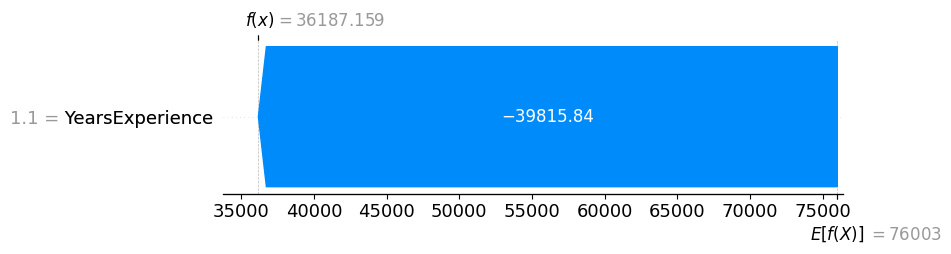

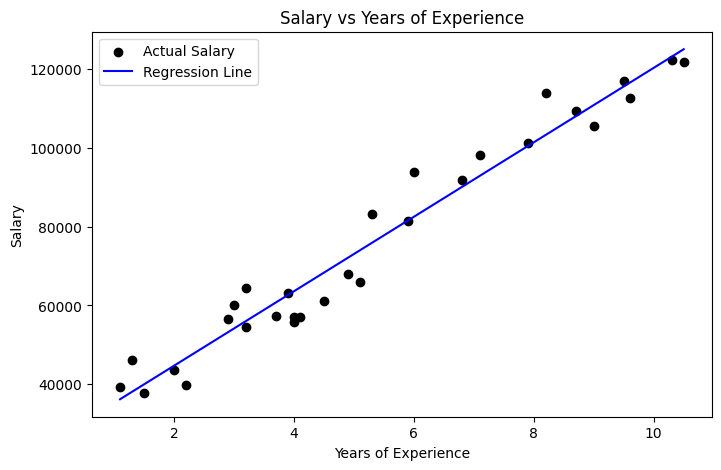

Instance 1: YearsExperience = 1.10, Base Prediction = 76003.00, SHAP Contribution = -39815.84, Final Prediction = 36187.16
Instance 2: YearsExperience = 1.30, Base Prediction = 76003.00, SHAP Contribution = -37925.85, Final Prediction = 38077.15
Instance 3: YearsExperience = 1.50, Base Prediction = 76003.00, SHAP Contribution = -36035.86, Final Prediction = 39967.14
Instance 4: YearsExperience = 2.00, Base Prediction = 76003.00, SHAP Contribution = -31310.88, Final Prediction = 44692.12
Instance 5: YearsExperience = 2.20, Base Prediction = 76003.00, SHAP Contribution = -29420.88, Final Prediction = 46582.12
Instance 6: YearsExperience = 2.90, Base Prediction = 76003.00, SHAP Contribution = -22805.91, Final Prediction = 53197.09
Instance 7: YearsExperience = 3.00, Base Prediction = 76003.00, SHAP Contribution = -21860.91, Final Prediction = 54142.09
Instance 8: YearsExperience = 3.20, Base Prediction = 76003.00, SHAP Contribution = -19970.92, Final Prediction = 56032.08
Instance 9: Year

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Experience_Salary.csv")

X = df[['YearsExperience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]
print(f"Regression equation: y = {intercept:.2f} + {slope:.2f} * YearsExperience")

pred_3_5 = model.predict(np.array([[3.5]]))[0]
pred_7 = model.predict(np.array([[7]]))[0]
print(f"Predicted Salary for 3.5 years experience: {pred_3_5:.2f}")
print(f"Predicted Salary for 7 years experience: {pred_7:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

df['Prediction'] = model.predict(X)
df['Baseline'] = shap_values.base_values
df['SHAP_YearsExp'] = shap_values.values[:, 0]

print("\nFirst 5 rows with SHAP values:")
print(df.head())

shap.plots.waterfall(shap_values[0])

shap.plots.force(shap_values[0])


plt.figure(figsize=(8,5))
plt.scatter(X, y, color='black', label='Actual Salary')
plt.plot(X, df['Prediction'], color='blue', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()
for i in range(len(df)):
    base_value = shap_values.base_values[i]
    contribution = shap_values.values[i][0]
    print(f"Instance {i+1}: YearsExperience = {X.iloc[i,0]:.2f}, "
          f"Base Prediction = {base_value:.2f}, "
          f"SHAP Contribution = {contribution:.2f}, "
          f"Final Prediction = {base_value + contribution:.2f}")